## Import libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_theme(style='whitegrid')
import missingno as msno

Our data is retrieved from [website](https://www.ncei.noaa.gov/cdo-web/search?datasetid=GHCND)

The initial data was pulled from this [github repository](https://github.com/galenegan/DATA-3320/tree/main/weather) and are called `seattle_rain.csv` and `ny_rain.csv`.

Load the Seattle data set

In [2]:
df_seattle = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/seattle_rain.csv')

Load the New York data set

In [3]:
df_ny = pd.read_csv('https://raw.githubusercontent.com/galenegan/DATA-3320/main/weather/ny_rain.csv')

## Explore the Contents of the Datasets

In [4]:
df_seattle.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,7003.000000,7003.000000,7003.000000,143.000000,143.000000,6718.000000,3006.000000,1331.000000,0.0,0.0
mean,47.593303,-122.322535,102.045666,5.776224,0.892098,0.132364,0.050000,0.172727,NaN,NaN
std,0.091807,0.023108,31.391744,6.723325,1.585583,0.270202,0.466821,0.960576,NaN,NaN
min,47.444670,-122.382541,37.200000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,47.543999,-122.314420,74.100000,2.000000,0.080000,0.000000,0.000000,0.000000,NaN,NaN
50%,47.611700,-122.312907,112.500000,4.000000,0.420000,0.010000,0.000000,0.000000,NaN,NaN
75%,47.696532,-122.308500,121.300000,6.000000,1.000000,0.140000,0.000000,0.000000,NaN,NaN
max,47.702387,-122.303810,135.600000,53.000000,11.400000,3.010000,10.000000,11.000000,NaN,NaN


In [5]:
df_ny.describe()

,LATITUDE,LONGITUDE,ELEVATION,DAPR,MDPR,PRCP,SNOW,SNWD,DASF,MDSF
count,17465.000000,17465.000000,17465.000000,155.000000,151.000000,17275.000000,11508.000000,6318.000000,0.0,0.0
mean,40.826103,-73.697762,48.792551,5.187097,0.835695,0.136644,0.043483,0.255033,NaN,NaN
std,0.189215,0.210564,46.087915,5.581494,1.253480,0.396871,0.520562,1.465410,NaN,NaN
min,40.615654,-74.145561,2.100000,2.000000,0.000000,0.000000,0.000000,0.000000,NaN,NaN
25%,40.668899,-73.823290,4.300000,2.000000,0.070000,0.000000,0.000000,0.000000,NaN,NaN
50%,40.758947,-73.710999,42.700000,3.000000,0.390000,0.000000,0.000000,0.000000,NaN,NaN
75%,41.091681,-73.505371,91.700000,5.000000,1.010000,0.060000,0.000000,0.000000,NaN,NaN
max,41.150120,-73.358045,175.000000,42.000000,7.000000,9.450000,16.000000,18.000000,NaN,NaN


In [6]:
print(df_seattle.columns)
print(df_ny.columns)

Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'DASF', 'MDSF'],
      dtype='object')
Index(['STATION', 'NAME', 'LATITUDE', 'LONGITUDE', 'ELEVATION', 'DATE', 'DAPR',
       'MDPR', 'PRCP', 'SNOW', 'SNWD', 'DASF', 'MDSF'],
      dtype='object')


Check data types

In [7]:
df_seattle.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

In [8]:
df_ny.dtypes

STATION       object
NAME          object
LATITUDE     float64
LONGITUDE    float64
ELEVATION    float64
DATE          object
DAPR         float64
MDPR         float64
PRCP         float64
SNOW         float64
SNWD         float64
DASF         float64
MDSF         float64
dtype: object

# Convert data types for cleaning

In [9]:
#convert DATE column to datetime format
df_seattle["DATE"] = pd.to_datetime(df_seattle["DATE"])
df_seattle.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

In [10]:
df_ny["DATE"] = pd.to_datetime(df_ny["DATE"])
df_ny.dtypes

STATION              object
NAME                 object
LATITUDE            float64
LONGITUDE           float64
ELEVATION           float64
DATE         datetime64[ns]
DAPR                float64
MDPR                float64
PRCP                float64
SNOW                float64
SNWD                float64
DASF                float64
MDSF                float64
dtype: object

Exploratory Data Analysis

Graph precipitation for Seattle on each date

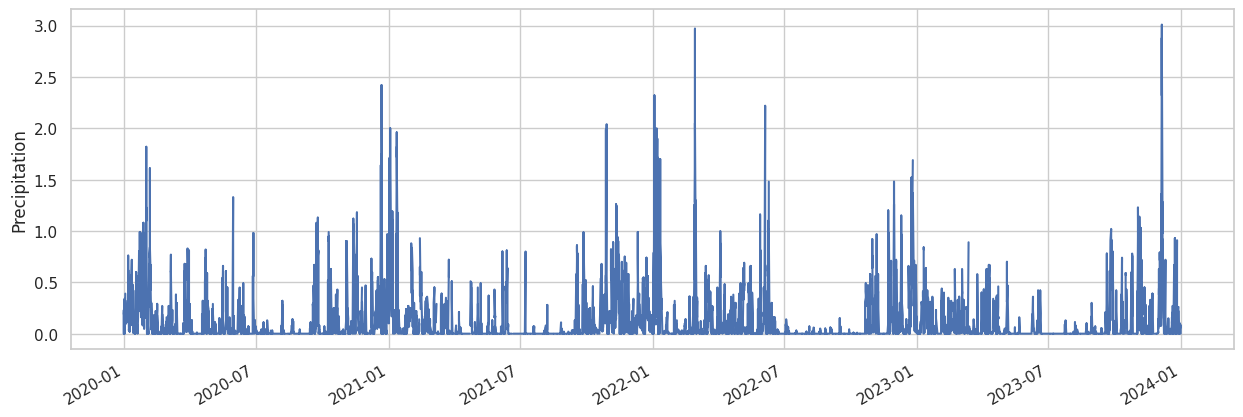

In [11]:
fig, ax = plt.subplots()
ax.plot(df_seattle["DATE"], df_seattle["PRCP"])
ax.set_ylabel('Precipitation')
fig.autofmt_xdate()
fig.set_size_inches(15,5)

Graph precipitation for NYC on each date

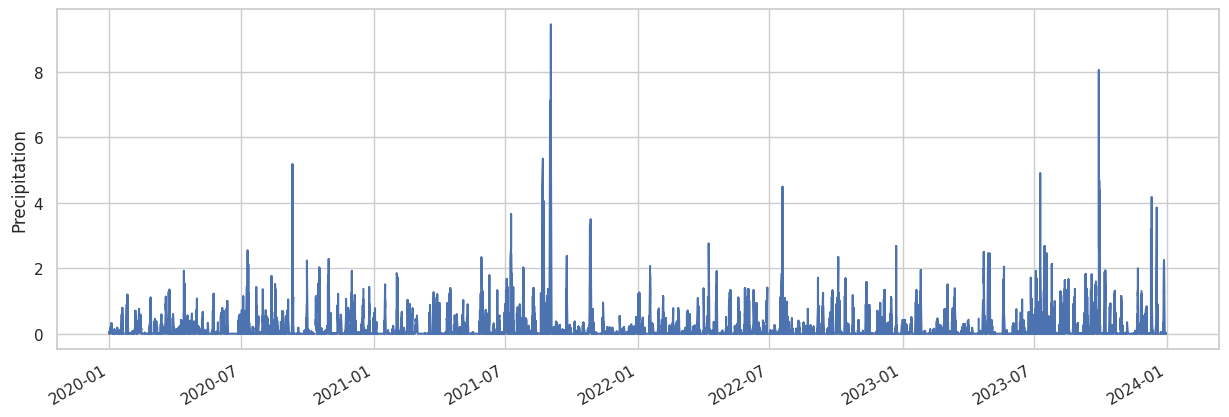

In [12]:
fig, ax = plt.subplots()
ax.plot(df_ny["DATE"], df_ny["PRCP"])
ax.set_ylabel('Precipitation')
fig.autofmt_xdate()
fig.set_size_inches(15,5)

## Select relevant subsets of the data

Remove Unneccesary Variables

In [13]:
df_seattle = df_seattle.drop(columns = ["ELEVATION","DAPR","MDPR","SNOW","SNWD","DASF","MDSF"])
df_ny = df_ny.drop(columns = ["ELEVATION","DAPR","MDPR","SNOW","SNWD","DASF","MDSF"])

Average by date


In [14]:
df_seattle_avg = df_seattle.groupby(by="DATE", as_index = False)["PRCP"].mean()
df_ny_avg = df_seattle.groupby(by="DATE", as_index = False)["PRCP"].mean()

In [15]:
df_ny_avg.head(10)

,DATE,PRCP
0,2020-01-01,0.162500
1,2020-01-02,0.181250
2,2020-01-03,0.267500
3,2020-01-04,0.172000
4,2020-01-05,0.168571
5,2020-01-06,0.233333
6,2020-01-07,0.511111
7,2020-01-08,0.042500
8,2020-01-09,0.060000
9,2020-01-10,0.167778


In [16]:
df_seattle_avg.head(10)

,DATE,PRCP
0,2020-01-01,0.162500
1,2020-01-02,0.181250
2,2020-01-03,0.267500
3,2020-01-04,0.172000
4,2020-01-05,0.168571
5,2020-01-06,0.233333
6,2020-01-07,0.511111
7,2020-01-08,0.042500
8,2020-01-09,0.060000
9,2020-01-10,0.167778


Check number of observations are equal

In [17]:
print(len(df_ny_avg) == len(df_seattle_avg))

True


In [18]:
print(len(df_ny_avg)) #should be 1461 days, 365*4 + 1

1461


## Random sample method

In [19]:
nkeep = 1461
df_seattle_subsample = df_seattle.sample(nkeep)
df_seattle_subsample = df_seattle_subsample.sort_values(by = "DATE")

Identify two stations from each state

In [20]:
df_seatac = df_seattle.loc[df_seattle["NAME"] =="SEATTLE TACOMA AIRPORT, WA US"]
df_jfk = df_ny.loc[df_ny["NAME"] =="JFK INTERNATIONAL AIRPORT, NY US"]

In [21]:
print(df_seatac.shape)
print(df_jfk.shape)

(1366, 6)
(1462, 6)


Merge data from both stations into one dataframe

In [22]:
df_port_merge = df_seatac[["DATE","PRCP"]].merge(df_jfk[["DATE","PRCP"]], on = "DATE", how = "right")

In [23]:
df_port_merge.head(5)

,DATE,PRCP_x,PRCP_y
0,2020-01-01,0.00,0.00
1,2020-01-01,0.00,0.00
2,2020-01-02,0.21,0.00
3,2020-01-03,0.39,0.13
4,2020-01-04,0.10,0.16


In [24]:
df_tidy = pd.melt(df_port_merge, id_vars = "DATE", var_name = "CITY", value_name = "Precipitation")

Check for duplicate values, drop if found

In [25]:
df_tidy = df_tidy.drop_duplicates()
df_tidy = df_tidy.reset_index(drop=True)

print(df_tidy)

           DATE    CITY  Precipitation
0    2020-01-01  PRCP_x           0.00
1    2020-01-02  PRCP_x           0.21
2    2020-01-03  PRCP_x           0.39
3    2020-01-04  PRCP_x           0.10
4    2020-01-05  PRCP_x           0.14
...         ...     ...            ...
2917 2023-12-27  PRCP_y           0.19
2918 2023-12-28  PRCP_y           1.55
2919 2023-12-29  PRCP_y           0.02
2920 2023-12-30  PRCP_y           0.00
2921 2023-12-31  PRCP_y           0.00

[2922 rows x 3 columns]


Ensure counts of both cities are equal

In [26]:
print(df_tidy['CITY'].value_counts())

CITY
PRCP_x    1461
PRCP_y    1461
Name: count, dtype: int64


Rename City variables accordingly

In [27]:
df_tidy.loc[df_tidy['CITY'] == 'PRCP_x','CITY'] = 'Seattle'

df_tidy.loc[df_tidy['CITY'] == 'PRCP_y','CITY'] = 'NYC'

df_tidy

,DATE,CITY,Precipitation
0,2020-01-01,Seattle,0.00
1,2020-01-02,Seattle,0.21
2,2020-01-03,Seattle,0.39
3,2020-01-04,Seattle,0.10
4,2020-01-05,Seattle,0.14
...,...,...,...
2917,2023-12-27,NYC,0.19
2918,2023-12-28,NYC,1.55
2919,2023-12-29,NYC,0.02
2920,2023-12-30,NYC,0.00


In [28]:
df_tidy.head()

,DATE,CITY,Precipitation
0,2020-01-01,Seattle,0.00
1,2020-01-02,Seattle,0.21
2,2020-01-03,Seattle,0.39
3,2020-01-04,Seattle,0.10
4,2020-01-05,Seattle,0.14


Check for Null Values

In [29]:
print(df_tidy[df_tidy['Precipitation'].isnull()])


           DATE     CITY  Precipitation
5    2020-01-06  Seattle            NaN
34   2020-02-04  Seattle            NaN
43   2020-02-13  Seattle            NaN
49   2020-02-19  Seattle            NaN
51   2020-02-21  Seattle            NaN
...         ...      ...            ...
1421 2023-11-22  Seattle            NaN
1423 2023-11-24  Seattle            NaN
1424 2023-11-25  Seattle            NaN
1442 2023-12-13  Seattle            NaN
1457 2023-12-28  Seattle            NaN

[232 rows x 3 columns]


Replace NAN values with average from that month across all 4 years

In [30]:
df_temp = df_tidy
df_temp['MONTH'] = df_tidy['DATE'].dt.month
#calculate the average precipitation for each month across all 4 years.
mean_prcp_bymonth = df_tidy.groupby(['CITY', 'MONTH'])['Precipitation'].mean()
mean_prcp_bymonth
#replace NaN values with the associated average value
df_tidy['Precipitation'] = df_tidy.apply(lambda row: mean_prcp_bymonth.loc[(row['CITY'], row['MONTH'])] if pd.isna(row['Precipitation']) else row['Precipitation'], axis=1)
df_temp['Precipitation'] = df_temp['Precipitation'].round(3)


Drop the temporary column

In [31]:
df_tidy.drop(columns=['MONTH'], inplace=True)
df_tidy

,DATE,CITY,Precipitation
0,2020-01-01,Seattle,0.00
1,2020-01-02,Seattle,0.21
2,2020-01-03,Seattle,0.39
3,2020-01-04,Seattle,0.10
4,2020-01-05,Seattle,0.14
...,...,...,...
2917,2023-12-27,NYC,0.19
2918,2023-12-28,NYC,1.55
2919,2023-12-29,NYC,0.02
2920,2023-12-30,NYC,0.00


Test if NaN replacement worked

In [32]:
print(df_tidy[df_tidy['Precipitation'].isnull()])

Empty DataFrame
Columns: [DATE, CITY, Precipitation]
Index: []


In [33]:
df_tidy.describe()

,DATE,Precipitation
count,2922,2922.000000
mean,2021-12-31 00:00:00,0.114145
min,2020-01-01 00:00:00,0.000000
25%,2020-12-31 00:00:00,0.000000
50%,2021-12-31 00:00:00,0.000000
75%,2022-12-31 00:00:00,0.100000
max,2023-12-31 00:00:00,8.050000
std,NaN,0.302196


#Export the dataframe as a CSV file

In [34]:
df_tidy.to_csv('clean_seattle_nyc_weather.csv', index=False)